https://github.com/higgsfield/RL-Adventure-2

In [1]:
! git clone https://github.com/yc2454/gym-futbol.git

Cloning into 'gym-futbol'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 1328 (delta 74), reused 61 (delta 33), pack-reused 1226
Receiving objects: 100% (1328/1328), 2.97 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (690/690), done.


In [1]:
%cd ../../

/Users/yiduoke/Documents/gym-futbol


In [3]:
! git checkout yiduo

Branch 'yiduo' set up to track remote branch 'yiduo' from 'origin'.
Switched to a new branch 'yiduo'


In [4]:
! git pull

Already up to date.


In [27]:
! cd ../../
! pwd

/Users/yiduoke/Documents/gym-futbol/gym_futbol/envs


In [26]:
! pwd

/Users/yiduoke/Documents/gym-futbol/gym_futbol/envs


In [3]:
%tensorflow_version 1.14

UsageError: Line magic function `%tensorflow_version` not found.


In [7]:
! pip install keras tensorflow gym numpy stable-baselines[mpi]==2.10.0

     |████████████████████████████████| 256kB 7.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8f7aa88981ba4dd4c26545d5bae4086e04f4323c2b18e7ea957131c4aef43aad
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


# env

#base 10 --> base b conversion

In [4]:
def base_convert(i, b):
    result = []
    while i > 0:
      result.insert(0, i % b)
      i = i // b
    for j in range(5-len(result)):
      result.insert(0, 0)
    return result

## import

In [21]:
import gym
import gym_futbol, random
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [7]:
individual_size = 4

def get_action_str(action):
      if action == 0:
            action_str = "run"
      elif action == 1:
            action_str = "intercept"
      elif action == 2:
            action_str = "shoot"
      else:
            action_str = "assist"

      return action_str

def test_env(env, vis=False):

    env.reset()
    done = False
    total_reward = 0
    while not done:

        action = random.randint(0,4**5-1)
        separated_actions = base_convert(action, individual_size)
        next_state, reward, done, _ = env.step(action)

        if vis: 

              plt.clf()

              predicition_ai1_action_type = separated_actions[0]
              predicition_ai2_action_type = separated_actions[1]
              predicition_ai3_action_type = separated_actions[2]
              predicition_ai4_action_type = separated_actions[3]
              predicition_ai5_action_type = separated_actions[4]

              title_str = ("reward : " + str(reward)
                          + "\n ai 1 action : " + get_action_str(predicition_ai1_action_type)
                          + "\n ai 2 action : " + get_action_str(predicition_ai2_action_type)
                          + "\n ai 3 action : " + get_action_str(predicition_ai3_action_type)
                          + "\n ai 4 action : " + get_action_str(predicition_ai4_action_type)
                          + "\n ai 5 action : " + get_action_str(predicition_ai5_action_type)
                          )
              plt.xlim(0, env.length)
              plt.ylim(0, env.width)

              # ai
              ai_1_x, ai_1_y, _, _, _, _ = env.obs[env.ai_1_index]
              ai_2_x, ai_2_y, _, _, _, _ = env.obs[env.ai_2_index]
              ai_3_x, ai_3_y, _, _, _, _ = env.obs[env.ai_3_index]
              ai_4_x, ai_4_y, _, _, _, _ = env.obs[env.ai_4_index]
              ai_5_x, ai_5_y, _, _, _, _ = env.obs[env.ai_5_index]
              
              plt.plot(ai_1_x,ai_1_y, color = 'red', marker='o', markersize=10, label='ai1')
              plt.plot(ai_2_x,ai_2_y, color = 'red', marker='o', markersize=10, label='ai2')
              plt.plot(ai_3_x,ai_3_y, color = 'red', marker='o', markersize=10, label='ai3')
              plt.plot(ai_4_x,ai_4_y, color = 'red', marker='o', markersize=10, label='ai4')
              plt.plot(ai_5_x,ai_5_y, color = 'red', marker='o', markersize=10, label='ai5')
              

              # opponents (hard coded)
              opp_1_x, opp_1_y, _, _, _, _ = env.obs[env.opp_1_index]
              opp_2_x, opp_2_y, _, _, _, _ = env.obs[env.opp_2_index]
              opp_3_x, opp_3_y, _, _, _, _ = env.obs[env.opp_3_index]
              opp_4_x, opp_4_y, _, _, _, _ = env.obs[env.opp_4_index]
              opp_5_x, opp_5_y, _, _, _, _ = env.obs[env.opp_5_index]
              
              
              plt.plot(opp_1_x, opp_1_y, color = 'blue', marker='o', markersize=10, label='opp1')
              plt.plot(opp_2_x, opp_2_y, color = 'blue', marker='o', markersize=10, label='opp2')
              plt.plot(opp_3_x, opp_3_y, color = 'blue', marker='o', markersize=10, label='opp3')
              plt.plot(opp_4_x, opp_4_y, color = 'blue', marker='o', markersize=10, label='opp4')
              plt.plot(opp_5_x, opp_5_y, color = 'blue', marker='o', markersize=10, label='opp5')
              
              # ball
              ball_x, ball_y, _, _, _, _ = env.obs[env.ball_index]
              plt.plot(ball_x, ball_y, color = 'green', marker='o', markersize=6, label='ball')

              plt.legend()

              plt.title(title_str, loc = 'left')

              display.display(plt.gcf())
              display.clear_output(wait=True)

        total_reward += reward

    return total_reward

## Test

In [15]:
%cd envs

/Users/yiduoke/Documents/gym-futbol/gym_futbol/envs


In [17]:
futbol_env = gym.make("Futbol-v0")

In [18]:
a,_,_,_ = futbol_env.step(0)
a

array([[ 45.3       ,  34.        ,   9.        ,   0.        ,
          9.        ,   0.        ],
       [ 18.64163973,  23.03634048,  35.        ,  11.33333333,
          6.        ,   0.        ],
       [ 19.0221863 ,  44.84043491,  35.        , -11.33333333,
          8.        ,   0.        ],
       [ 36.67871124,  23.75383204,  17.5       ,  11.33333333,
         10.        ,   0.        ],
       [ 36.17509787,  44.57231757,  17.5       , -11.33333333,
          7.        ,   0.        ],
       [ 61.5       ,  39.        ,  -9.        ,  -5.        ,
          6.        ,   0.        ],
       [ 87.5       ,  22.66666667, -35.        ,  11.33333333,
          6.        ,   0.        ],
       [ 87.5       ,  45.33333333, -35.        , -11.33333333,
          7.        ,   0.        ],
       [ 70.        ,  22.66666667, -17.5       ,  11.33333333,
          9.        ,   0.        ],
       [ 70.        ,  45.33333333, -17.5       , -11.33333333,
          9.        ,   0. 

TypeError: 'NoneType' object is not subscriptable

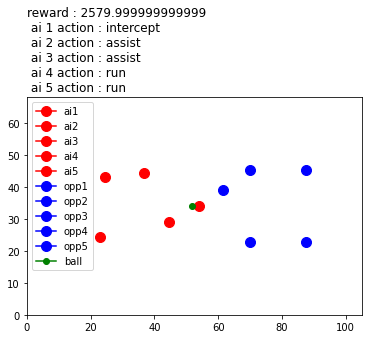

In [20]:
test_env(futbol_env, vis=True)

# Baseline

In [0]:
import os, time, gym
from stable_baselines.common.policies import MlpPolicy, FeedForwardPolicy, register_policy
from stable_baselines.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2
from stable_baselines.bench import Monitor
from stable_baselines.common.env_checker import check_env

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
log_dir = "/tmp/gym/{}".format(int(time.time()))
os.makedirs(log_dir, exist_ok=True)

In [0]:
env = gym.make('Futbol-v0')
check_env(env, warn=True)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float64
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/stable_baselines/common/env_checker.py:202: UserWarning: Your observation has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector
  warnings.warn("Your observation has an unconventional shape (neither an image, nor a 1D vector). "


In [0]:
num_envs = 8
env = gym.make('Futbol-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env] * num_envs)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float64
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:
# https://stable-baselines.readthedocs.io/en/master/guide/custom_policy.html
# Custom MLP policy 
class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           net_arch=[64, dict(pi=[64, 64],
                                                              vf=[64, 64])],
                                           feature_extraction="mlp")

In [0]:
# use custom MLP policy
model = PPO2(CustomPolicy, env, verbose=1)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





In [0]:
# use defalut MLP policy (2 layers of 64)
model = PPO2(MlpPolicy, env, verbose=1)

In [0]:
model.learn(total_timesteps=10 ** 6)

Streaming output truncated to the last 5000 lines.
| time_elapsed       | 297           |
| total_timesteps    | 658432        |
| value_loss         | 21820.674     |
--------------------------------------
--------------------------------------
| approxkl           | 6.37661e-05   |
| clipfrac           | 0.0           |
| ep_len_mean        | 401           |
| ep_reward_mean     | 2.73e+03      |
| explained_variance | -2.5e-06      |
| fps                | 2201          |
| n_updates          | 644           |
| policy_entropy     | 1.8004388     |
| policy_loss        | 1.8669147e-05 |
| serial_timesteps   | 82432         |
| time_elapsed       | 297           |
| total_timesteps    | 659456        |
| value_loss         | 29616.055     |
--------------------------------------
---------------------------------------
| approxkl           | 0.000325453    |
| clipfrac           | 0.0            |
| ep_len_mean        | 401            |
| ep_reward_mean     | 2.71e+03       |
| explai

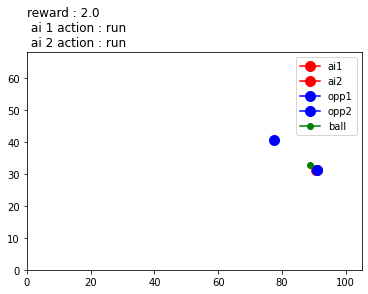

In [0]:
env = gym.make('Futbol-v0')
ob = env.reset()
done = False
total_reward = 0
while not done:
    action, _states = model.predict(ob)
    ob, reward, done, info = env.step(action)
    plt.clf()

    individual_size = 4

    predicition_ai1_action_type = action // individual_size 
    predicition_ai2_action_type = action % individual_size  

    title_str = ("reward : " + str(reward)
                + "\n ai 1 action : " + get_action_str(predicition_ai1_action_type)
                + "\n ai 2 action : " + get_action_str(predicition_ai2_action_type)
                )
    plt.xlim(0, env.length)
    plt.ylim(0, env.width)

    # ai
    ai_1_x, ai_1_y, _, _, _, _ = env.obs[env.ai_1_index]
    ai_2_x, ai_2_y, _, _, _, _ = env.obs[env.ai_2_index]
    plt.plot(ai_1_x,ai_1_y, color = 'red', marker='o', markersize=10, label='ai1')
    plt.plot(ai_2_x,ai_2_y, color = 'red', marker='o', markersize=10, label='ai2')

    # opp_1
    opp_1_x, opp_1_y, _, _, _, _ = env.obs[env.opp_1_index]
    opp_2_x, opp_2_y, _, _, _, _ = env.obs[env.opp_2_index]
    plt.plot(opp_1_x, opp_1_y, color = 'blue', marker='o', markersize=10, label='opp1')
    plt.plot(opp_2_x, opp_2_y, color = 'blue', marker='o', markersize=10, label='opp2')
    # ball
    ball_x, ball_y, _, _, _, _ = env.obs[env.ball_index]
    plt.plot(ball_x, ball_y, color = 'green', marker='o', markersize=6, label='ball')

    plt.legend()

    plt.title(title_str, loc = 'left')

    display.display(plt.gcf())
    display.clear_output(wait=True)
    total_reward += reward

In [0]:
total_reward

1760.0